$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 3: Activation Functions

Michael Johnesee

## Overview

The purpose of this notebook is to examine the potential performance increase of a neural network by using different neural networks.  The examples below will compare ```Hyperbolic Tangent``` against ```Rectified Linear Unit``` (ReLU). 

The equations for ```tanh``` are as follows.

$$f(x)={e^x-e^{-x} \above 1pt e^z+e^{-z}}$$

$$f'(x)=1-tanh^2(x)$$

### NeuralNetworkReLU

The provided python file ```neuralnetworksA2.py``` features a training method with the activation function and its derivative seperated out. The code below creates a new subclass of the network named ```NeuralNetworkReLU``` and overrides the two necessary methods ```activation``` and ```activationDerivative``` using the ```ReLU``` algorithms shown below. 

$$f(x) = max( 0, x )$$

$$f′(x) = 
\cases{
1  & \text{if } x\gt 0\cr
0 & \text{otherwise}
}$$

In [1]:
import neuralnetworksA2 as nn
class NeuralNetworkReLU(nn.NeuralNetwork):
    def __init__(self, ni, nhs, no):
        super(NeuralNetworkReLU, self).__init__(ni, nhs, no) 
        
    def activation(self, weighted_sum):
        return weighted_sum * (weighted_sum > 0)
#         return np.maximum(0,weighted_sum)

    def activationDerivative(self, activation_value):
        return 1. * (activation_value > 0)

### Visualizing Functions

Below features two graphs showing the equations ```f(x)``` first,  followed by  ```f'(x)``` below it.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
nnT = nn.NeuralNetwork(1,1,1)
nnR = NeuralNetworkReLU(1,1,1)

In [4]:
x = np.arange(-2, 2, 0.05)

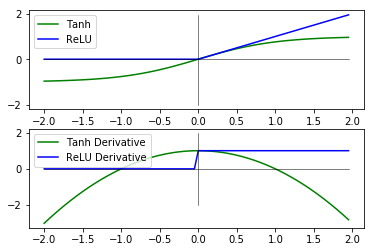

In [5]:
plt.figure(1)
plt.subplot(211)
plt.plot(x, nnT.activation(x), 'g', x, nnR.activation(x), 'b')
plt.plot(x, x*0, x*0, x, color="black", linewidth= 0.5)
plt.legend(('Tanh', 'ReLU'))

plt.subplot(212)
plt.plot(x, nnT.activationDerivative(x), 'g', x, nnR.activationDerivative(x), 'b')
plt.plot(x, x*0, x*0, x, color="black", linewidth= 0.5)
plt.legend(('Tanh Derivative', 'ReLU Derivative'))

### Utility Functions

The `partition` method is used to shuffle and separate the data into training and testing sets, based on the percentage entered,  for input into the networks `train` method. 

The `rmse` method calculates the root-mean-squared deviation of the neural network models as an indicator of the models accuracy

$$f(x)=\sqrt{(x_{1}-x_{2})^2}$$

The working directory must also contain `neuralnetworksA2.py` and `mlutilities.py`.

In [6]:
def partition(X, T, percent, shuffle=True):
    nRows = X.shape[0]
    rows = np.arange(nRows)
    if shuffle is True:
        np.random.shuffle(rows)
    nTrain = int(nRows * percent)
    trainRows = rows[:nTrain]
    testRows = rows[nTrain:]
    Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
    Xtest, Ttest = X[testRows, :], T[testRows, :]
    return Xtrain,Ttrain,Xtest,Ttest

def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

def dictMax(errors_dict):
    ymax = 0
    for key in errors_dict:
        a, b = errors_dict[key][['Train RMSE', 'Test RMSE']].max()
        ymax = max(ymax, a, b,)
    return ymax

def dictMin(errors_dict):
    ymin = float('inf')
    for key in errors_dict:
        a, b = errors_dict[key][['Train RMSE', 'Test RMSE']].min()
        ymin = min(ymin, a, b)
    return ymin

### Partition Test

Below is a simple example to show how the partition function shuffles and sorts the `Input`, X,  and `Target`, T,  matricies.

In [7]:
X = np.arange(10*2).reshape((10, 2))
T = X[:, 0:1] * 0.1

In [8]:
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [9]:
T

array([[ 0. ],
       [ 0.2],
       [ 0.4],
       [ 0.6],
       [ 0.8],
       [ 1. ],
       [ 1.2],
       [ 1.4],
       [ 1.6],
       [ 1.8]])

In [10]:
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=True)

In [11]:
Xtrain

array([[ 0,  1],
       [ 6,  7],
       [10, 11],
       [ 8,  9],
       [12, 13],
       [14, 15],
       [ 2,  3],
       [16, 17]])

In [12]:
Ttrain

array([[ 0. ],
       [ 0.6],
       [ 1. ],
       [ 0.8],
       [ 1.2],
       [ 1.4],
       [ 0.2],
       [ 1.6]])

In [13]:
Xtest

array([[18, 19],
       [ 4,  5]])

In [14]:
Ttest

array([[ 1.8],
       [ 0.4]])

### Comparison Test

The data set, obtained from the UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/ml/index.php) contains temperature and humidity conditions for a house, recorded over 4.5 months and averaged into 10 min periods. The temperature and humidity was monitored with a ZigBee wireless sensor network, while energy usage was logged by m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from Reliable Prognosis (https://rp5.ru/). This neural net will use the following columns:

Target Data Set: energy in Wh 

    * Appliances - energy use of appliances
     
Input Data Set: energy in Wh, Temperature (Tx) is in Celsius, Humidity (RH_x) by %

    * Lights - lights
    * Kitchen - T1, RH_1
    * Living Room - T2, RH_2
    * Laundry Room - T3, RH_3
    * Office Room - T4, RH_4
    * Bathroom - T5, RH_5
    * Outside House- T6, RH_6
    * Ironing Room - T7, RH_7
    * Teenager Room - T8, RH_8 
    * Parent's Room - T9, RH_9
    * Outside Chievres Weather Station - To, RH_out
    * Outside Chievres Weather Station - Pressure in mm Hg 
    * Outside Chievres Weather Station - Wind speed in m/s 
    * Outside Chievres Weather Station - Visibility in km 
    * Outside Chievres Weather Station - Tdewpoint in Celsius
  

The goal is to predict the energy used by appliances given the various data points provided. In addition to the two activation functions, each time the `train` method is run it will be given a different hidden layer structure and number of iterations.

In [15]:
!curl -O http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  2 11.4M    2  267k    0     0   267k      0  0:00:43 --:--:--  0:00:43  342k
 13 11.4M   13 1621k    0     0  1621k      0  0:00:07  0:00:01  0:00:06  902k
 27 11.4M   27 3197k    0     0  1598k      0  0:00:07  0:00:02  0:00:05 1149k
 42 11.4M   42 4919k    0     0  1639k      0  0:00:07  0:00:03  0:00:04 1295k
 57 11.4M   57 6684k    0     0  1671k      0  0:00:07  0:00:04  0:00:03 1397k
 72 11.4M   72 8491k    0     0  1698k      0  0:00:06  0:00:05  0:00:01 1639k
 87 11.4M   87 10.0M    0     0  1715k      0  0:00:06  0:00:06 --:--:-- 1739k
100 11.4M  100 11.4M    0     0  1671k      0  0:00:07  0:00:07 --:--:-- 1778k


#### Testing Process
- For each number of iterations in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
     - For each hidden layer structure in [[u]*nl for u in [1, 2, 5, 10, 50] for nl in [1, 2, 3, 4, 5, 10]]:
         - For each of the two activation functions, ```tanh```, and ```ReLU```:
              - Repeat 10 times:
                  - Randomly partition the data into training set with 80% of samples and testing set with other 20%.
                  - Create a neural network using the given activation function and hidden layer structure.
                  - Train the network for the chosen iterations.
                  - Calculate two RMS errors, one on the training partition and one on the testing partitions.
          - Calculate the mean of the training and testing RMS errors over the 10 repetitions.

In [16]:
X_names = list(pd.read_csv('energydata_complete.csv', nrows=1).columns)
b = ['date','Appliances', 'rv1', 'rv2']
X_names = [x for x in X_names if x not in b]
T_names = ['Appliances']
X_names, T_names

(['lights',
  'T1',
  'RH_1',
  'T2',
  'RH_2',
  'T3',
  'RH_3',
  'T4',
  'RH_4',
  'T5',
  'RH_5',
  'T6',
  'RH_6',
  'T7',
  'RH_7',
  'T8',
  'RH_8',
  'T9',
  'RH_9',
  'T_out',
  'Press_mm_hg',
  'RH_out',
  'Windspeed',
  'Visibility',
  'Tdewpoint'],
 ['Appliances'])

In [17]:
X = pd.read_csv('energydata_complete.csv', usecols=X_names)
T = pd.read_csv('energydata_complete.csv', usecols=T_names)
X.shape, T.shape

((19735, 25), (19735, 1))

In [18]:
hiddens = [[u]*nl for u in [1, 2, 5, 10] for nl in [1, 2, 3, 4, 5, 10]]
print(hiddens)

final_titles = ['Layer', 'Train RMSE', 'Test RMSE']

[[1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2], [2, 2], [2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]]


## 100 Iterations

In [19]:
nnT_final_errors = []
nnR_final_errors = []
nnT_dict = {}
nnR_dict = {}
i = 100
test_variables = {}
# For each hidden layer structure
for layer in hiddens:  
#         Repeat 10 times
    nnT_current_train = []
    nnT_current_test = []

    nnR_current_train = []
    nnR_current_test = []
    for attempt in range(10):
#         Randomly partition the data
        Xtrain, Ttrain, Xtest, Ttest = partition(X.values, T.values, 0.8, shuffle=True)
        test_variables[tuple([i, tuple(layer), attempt])] = Xtrain, Ttrain, Xtest, Ttest
#         Create a neural network for each activation function
        nnT = nn.NeuralNetwork(Xtrain.shape[1],layer,Ttrain.shape[1])
        nnR = NeuralNetworkReLU(Xtrain.shape[1],layer,Ttrain.shape[1])
#         Train the network for i iterations

        nnT.train(Xtrain, Ttrain, 100)
        nnR.train(Xtrain, Ttrain, 100)

#           Calculate train and test RMS errors

        nnT_current_train.append(rmse(Ttrain, nnT.use(Xtrain)))
        nnT_current_test.append(rmse(Ttest, nnT.use(Xtest)))

        nnR_current_train.append(rmse(Ttrain, nnR.use(Xtrain)))
        nnR_current_test.append(rmse(Ttest, nnR.use(Xtest)))

    nnT_final_errors.append( [ layer, np.mean(nnT_current_train), np.mean(nnT_current_test) ] )
    nnR_final_errors.append( [ layer, np.mean(nnR_current_train), np.mean(nnR_current_test) ] )

nnT_errors_df=pd.DataFrame(nnT_final_errors, columns=final_titles)
nnR_errors_df=pd.DataFrame(nnR_final_errors, columns=final_titles)
nnT_dict[i] = nnT_errors_df
nnR_dict[i] = nnR_errors_df

### Graph

In [20]:
ymax = max(dictMax(nnT_dict), dictMax(nnR_dict))
ymin = min(dictMin(nnT_dict), dictMin(nnR_dict))

buffer = (ymax - ymin) * .05
ymax = ymax + buffer
ymin = ymin - buffer

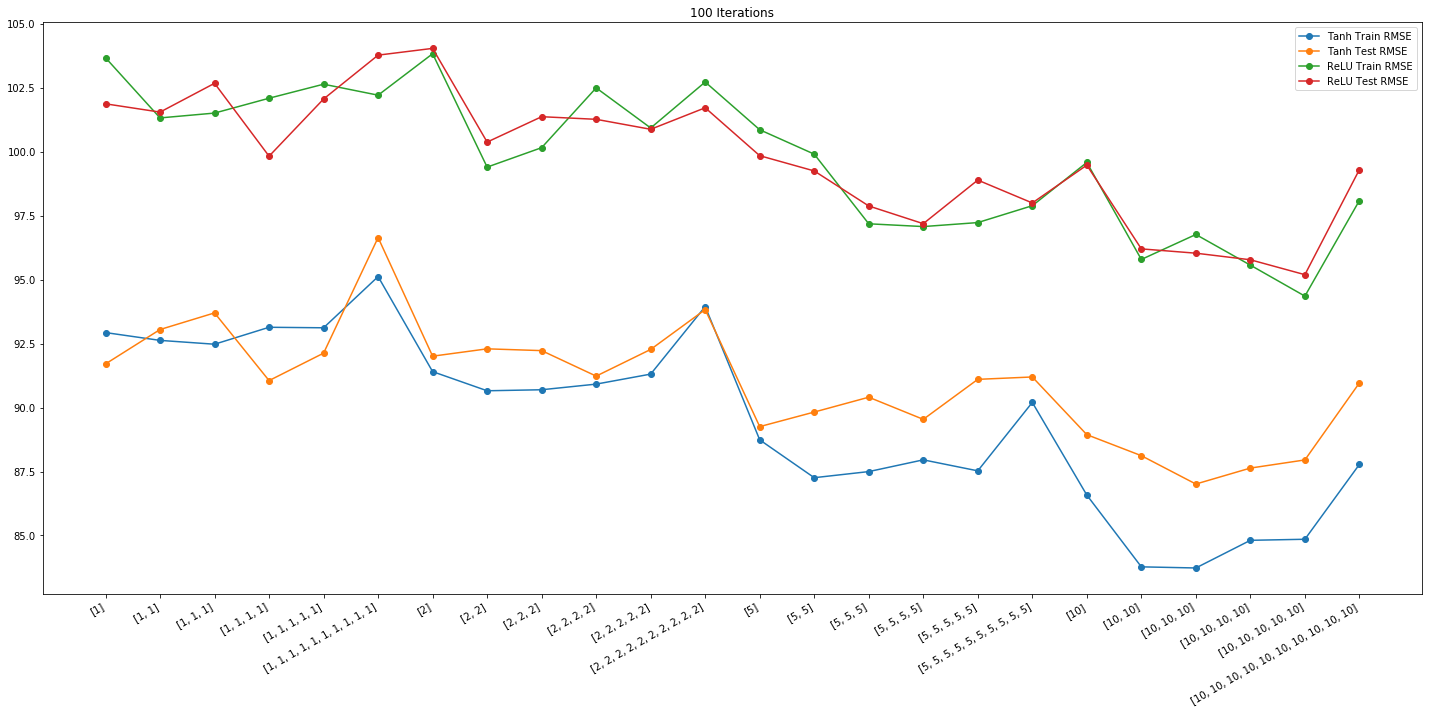

In [21]:
hidden_ticks, = nnT_errors_df['Layer'].shape
plt.figure(1, figsize=(20, 10))
plt.plot(nnT_dict[i][['Train RMSE', 'Test RMSE']].values, 'o-')
plt.plot(nnR_dict[i][['Train RMSE', 'Test RMSE']].values, 'o-')
plt.ylim(ymin, ymax)
plt.title("%d Iterations" % (i))
plt.legend(('Tanh Train RMSE', 'Tanh Test RMSE', 'ReLU Train RMSE', 'ReLU Test RMSE'))
plt.xticks(range(hidden_ticks), hiddens, rotation=30, horizontalalignment='right')
plt.tight_layout()

## Conlusion
Based on the energy dataset, the activation function of `Hyperbolic Tangent` outperformed the `Rectified Linear Unit` for all hidden layers structures.  Interestingly, they both showed a similar shape, most likely due to the shared partitions.  Both performed optimally with large hidden layer structures which could indicate further testing with larger structures.

## Preliminary Testing

Testing was done by downloading [A3grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A3grader.tar) and extracting `A3grader.py`. The code in the following cell demonstrates an example session, needing an execution score of  60 / 60 when functions and classes are defined correctly. The remaining 40 points were osubjectively-based on the the comparison results of the two activation functions applied to the energy data.



In [22]:
%run -i A3grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Johnesee-A3.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing  import neuralnetworksA2 as nn

--- 5/5 points. The statement  import neuralnetworksA2 as nn  works.

Testing nnet = nn.NeuralNetwork(1, 10, 1)

--- 5/5 points. nnet correctly constructed

Testing a = nnet.activation(-0.8)

--- 5/5 points. activation of -0.6640367702678489 is correct.

Testing da = nnet.activationDerivative(-0.664)

--- 5/5 points. activationDerivative of 0.5591039999999999 is correct.

Testing nnetrelu = NeuralNetworkReLU(1, 5, 1)

--- 5/5 points. nnet correctly constructed

Testing a = nnetrelu.activation(-0.8)

--- 5/5 points. activation of -0.0 is correct.

Testing a = nnetrelu.activation(1.8)

--- 5/5 points. activation of 1.8 is correct.

Testing da = nnetrelu.activationDerivative(0.0)

--- 5/5 points. activationDeriv

## Further Testing

Created another version of the neural network class, called ```NeuralNetworkSwish``` and repeat the above comparisons.  You may set the constant $\beta = 1$.  This is tricker than it sounds, because the Swish activation derivative requires the weighted sum as an argument.

## NeuralNetworkSwish

A third activation function, `Swish`, created in the same way as the `ReLU` by extending `NeuralNetwork` to a new class named `NeuralNetworkSwish` and defines `activation` and `activationDerivative` that implement the Swish activation function. In addition, the `_gradientF` method in `neuralnetworksA2.py` was also changed to allow the `activationDerivative` to receive weighted sums.

The equations for `Swish` is as follows.

$$
\eqalign{
f(x)&=x\cdot σ(β\cdot x) \\
σ(β\cdot x)&=\frac 1 {1+e^{−(β\cdot x)}}
}$$

$$
\eqalign{
f'(x) &= σ(β\cdot x) + β\cdot x · σ(β\cdot x)\cdot (1 − σ(β\cdot x)) \\
&= σ(β\cdot x) + β\cdot x · σ(β\cdot x) − β\cdot x · σ(β\cdot x)^2 \\
&= β\cdot x · σ(x) + σ(β\cdot x)\cdot (1 − β\cdot x \cdot σ(β\cdot x)) \\
&= β\cdot f(x) + σ(β\cdot x)\cdot (1 − β\cdot f(x))
}$$

In [23]:
class NeuralNetworkSwish(nn.NeuralNetwork):
    def __init__(self, ni, nhs, no):
        super(NeuralNetworkSwish, self).__init__(ni, nhs, no)    
    
    def swishSigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def activation(self, weighted_sum, beta=1):
        return weighted_sum*self.swishSigmoid(beta*weighted_sum)

    def activationDerivative(self, activation_value, weighted_sum, beta=1):
        fx = self.activation(activation_value)
        return beta*fx + self.swishSigmoid(beta*activation_value) * (1 - beta*fx)
    
    def _gradientF(self, w, X, T):
        self._unpack(w)
        # Do forward pass through all layers
        Zprev = X
        Z = [Zprev]
        for i in range(len(self.nhs)):
            V = self.Vs[i]
 
            # Zprev = np.tanh(Zprev @ V[1:, :] + V[0:1, :])
            Zprev = self.activation(Zprev @ V[1:, :] + V[0:1, :])

            Z.append(Zprev)
        Y = Zprev @ self.W[1:, :] + self.W[0:1, :]
        # Do backward pass, starting with delta in output layer
        delta = -(T - Y) / (X.shape[0] * T.shape[1])
        dW = np.vstack((np.ones((1, delta.shape[0])) @ delta, 
                        Z[-1].T @ delta))
        dVs = []
        delta = (1 - Z[-1]**2) * (delta @ self.W[1:, :].T)

        sumWeights = Z

        for Zi in range(len(self.nhs), 0, -1):
            Vi = Zi - 1  # because X is first element of Z
            dV = np.vstack((np.ones((1, delta.shape[0])) @ delta,
                            Z[Zi-1].T @ delta))
            dVs.insert(0, dV)

            # delta = (delta @ self.Vs[Vi][1:, :].T) * (1 - Z[Zi-1]**2)
            delta = (delta @ self.Vs[Vi][1:, :].T) * self.activationDerivative(Z[Zi - 1], sumWeights.pop())

        return self._pack(dVs, dW)

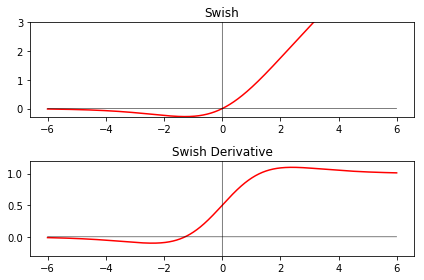

In [24]:
nnS = NeuralNetworkSwish(1,1,1)
x = np.arange(-6, 6, .01)

plt.figure(1)
plt.subplot(211)
plt.plot(x, nnS.activation(x), 'r')
plt.plot(x, x*0, x*0, x, color="black", linewidth= 0.5)
plt.title('Swish')
plt.ylim(-.3, 3)

plt.subplot(212)
plt.plot(x, nnS.activationDerivative(x, x), 'r')
plt.plot(x, x*0, x*0, x, color="black", linewidth= 0.5)
plt.title('Swish Derivative')
plt.ylim(-.3,1.2)

plt.tight_layout()

### Swish 100 Iteration

In [25]:
nnS_dict = {}

nnS_final_errors = []
# For each hidden layer structure
for layer in hiddens:  
#         Repeat 10 times
    nnS_current_train = []
    nnS_current_test = []

    for attempt in range(10):
#         Randomly partition the data
        Xtrain, Ttrain, Xtest, Ttest = test_variables[tuple([i, tuple(layer), attempt])]
#         Create a neural network for each activation function
        nnS = nn.NeuralNetwork(Xtrain.shape[1],layer,Ttrain.shape[1])
#         Train the network for i iterations
        nnS.train(Xtrain, Ttrain, i)
#           Calculate train and test RMS errors

        nnS_current_train.append(rmse(Ttrain, nnS.use(Xtrain)))
        nnS_current_test.append(rmse(Ttest, nnS.use(Xtest)))

    nnS_final_errors.append( [ layer, np.mean(nnS_current_train), np.mean(nnS_current_test) ] )

nnS_errors_df=pd.DataFrame(nnS_final_errors, columns=final_titles)
nnS_dict[i] = nnS_errors_df

### Swish 100 Iteration Comparison Graph

In [26]:
ymax = max(dictMax(nnT_dict), dictMax(nnR_dict), dictMax(nnS_dict))
ymin = min(dictMin(nnT_dict), dictMin(nnR_dict), dictMin(nnS_dict))
 
buffer = (ymax - ymin) * .05
ymax = ymax + buffer
ymin = ymin - buffer

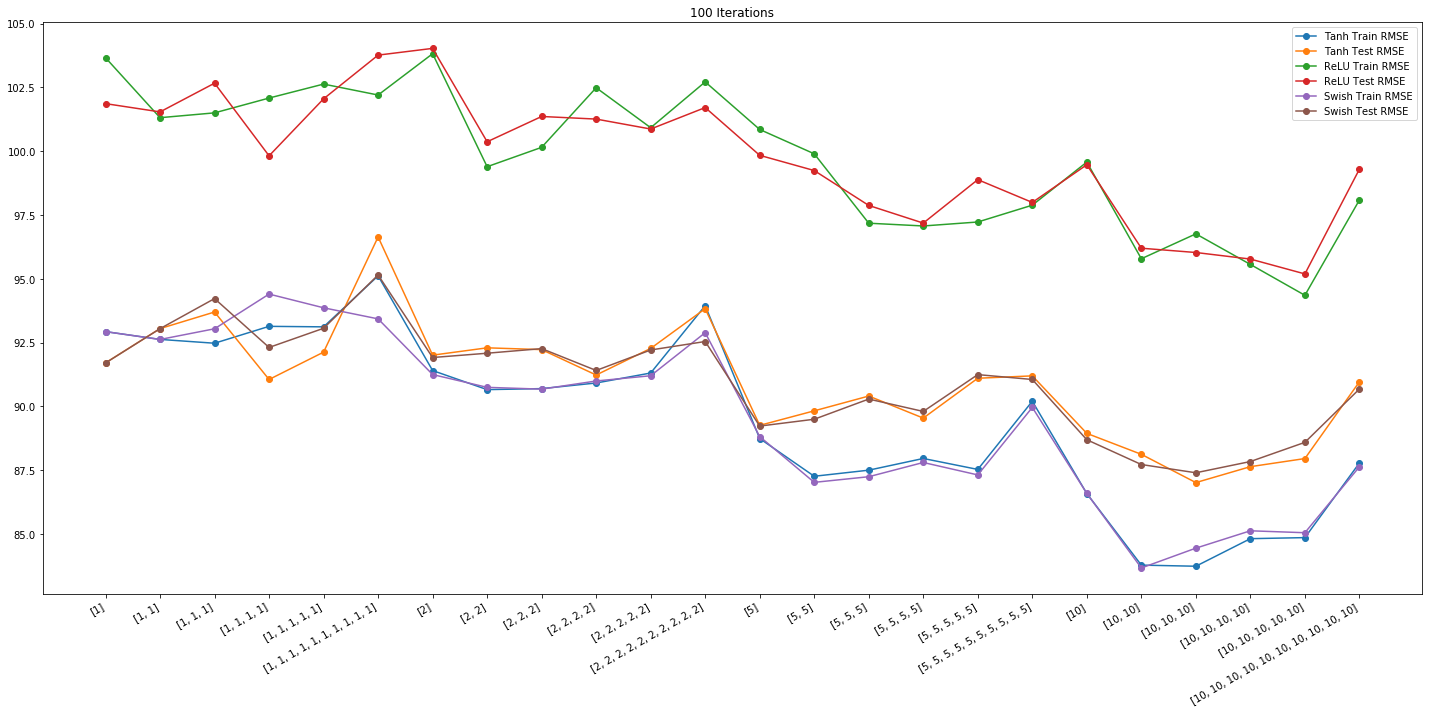

In [27]:
hidden_ticks, = nnT_errors_df['Layer'].shape
plt.figure(1, figsize=(20, 10))
plt.plot(nnT_dict[i][['Train RMSE', 'Test RMSE']].values, 'o-')
plt.plot(nnR_dict[i][['Train RMSE', 'Test RMSE']].values, 'o-')
plt.plot(nnS_dict[i][['Train RMSE', 'Test RMSE']].values, 'o-')
plt.ylim(ymin, ymax)
plt.title("%d Iterations" % (i))
plt.legend(('Tanh Train RMSE', 'Tanh Test RMSE', 'ReLU Train RMSE', 'ReLU Test RMSE', 'Swish Train RMSE', 'Swish Test RMSE'))
plt.xticks(range(hidden_ticks), hiddens, rotation=30, horizontalalignment='right')
plt.tight_layout()

## Multiple Iterations

In [30]:
X = pd.read_csv('energydata_complete.csv', usecols=X_names)
T = pd.read_csv('energydata_complete.csv', usecols=T_names)
X.shape, T.shape

((19735, 25), (19735, 1))

In [31]:
iterations = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

test_variables = {}
nnT_dict = {}
nnR_dict = {}
nnS_dict = {}

In [32]:
for i in iterations:
    nnT_final_errors = []
    nnR_final_errors = []
    nnS_final_errors = []
    # For each hidden layer structure
    for layer in hiddens:  
    #         Repeat 10 times
        nnT_current_train = []
        nnT_current_test = []

        nnR_current_train = []
        nnR_current_test = []
        
        nnS_current_train = []
        nnS_current_test = []
        
        for attempt in range(10):
    #         Randomly partition the data
            Xtrain, Ttrain, Xtest, Ttest = partition(X.values, T.values, 0.8, shuffle=True)
            test_variables[tuple([i, tuple(layer), attempt])] = Xtrain, Ttrain, Xtest, Ttest
    #         Create a neural network for each activation function
            nnT = nn.NeuralNetwork(Xtrain.shape[1],layer,Ttrain.shape[1])
            nnR = NeuralNetworkReLU(Xtrain.shape[1],layer,Ttrain.shape[1])
            nnS = NeuralNetworkSwish(Xtrain.shape[1],layer,Ttrain.shape[1])
    #         Train the network for i iterations
            
            nnT.train(Xtrain, Ttrain, i)
            nnR.train(Xtrain, Ttrain, i)
            nnS.train(Xtrain, Ttrain, i)
    #           Calculate train and test RMS errors
            
            nnT_current_train.append(rmse(Ttrain, nnT.use(Xtrain)))
            nnT_current_test.append(rmse(Ttest, nnT.use(Xtest)))
            
            nnR_current_train.append(rmse(Ttrain, nnR.use(Xtrain)))
            nnR_current_test.append(rmse(Ttest, nnR.use(Xtest)))
            
            nnS_current_train.append(rmse(Ttrain, nnS.use(Xtrain)))
            nnS_current_test.append(rmse(Ttest, nnS.use(Xtest)))

        nnT_final_errors.append( [ layer, np.mean(nnT_current_train), np.mean(nnT_current_test) ] )
        nnR_final_errors.append( [ layer, np.mean(nnR_current_train), np.mean(nnR_current_test) ] )
        nnS_final_errors.append( [ layer, np.mean(nnS_current_train), np.mean(nnS_current_test) ] )
    
    nnT_errors_df=pd.DataFrame(nnT_final_errors, columns=final_titles)
    nnR_errors_df=pd.DataFrame(nnR_final_errors, columns=final_titles)
    nnS_errors_df=pd.DataFrame(nnS_final_errors, columns=final_titles)
    
    nnT_dict[i] = nnT_errors_df
    nnR_dict[i] = nnR_errors_df
    nnS_dict[i] = nnS_errors_df

A3grader.py:6: RuntimeWarning: overflow encountered in exp
  assignmentNumber = '3'


### Visualizing results

Each graph, based on the iterations, represents the means of test and train errors for both activation functions versus the hidden layer structure.

In [33]:
ymax = max(dictMax(nnT_dict), dictMax(nnR_dict), dictMax(nnS_dict))
ymin = min(dictMin(nnT_dict), dictMin(nnR_dict), dictMin(nnS_dict))

buffer = (ymax - ymin) * .05
ymax = ymax + buffer
ymin = ymin - buffer

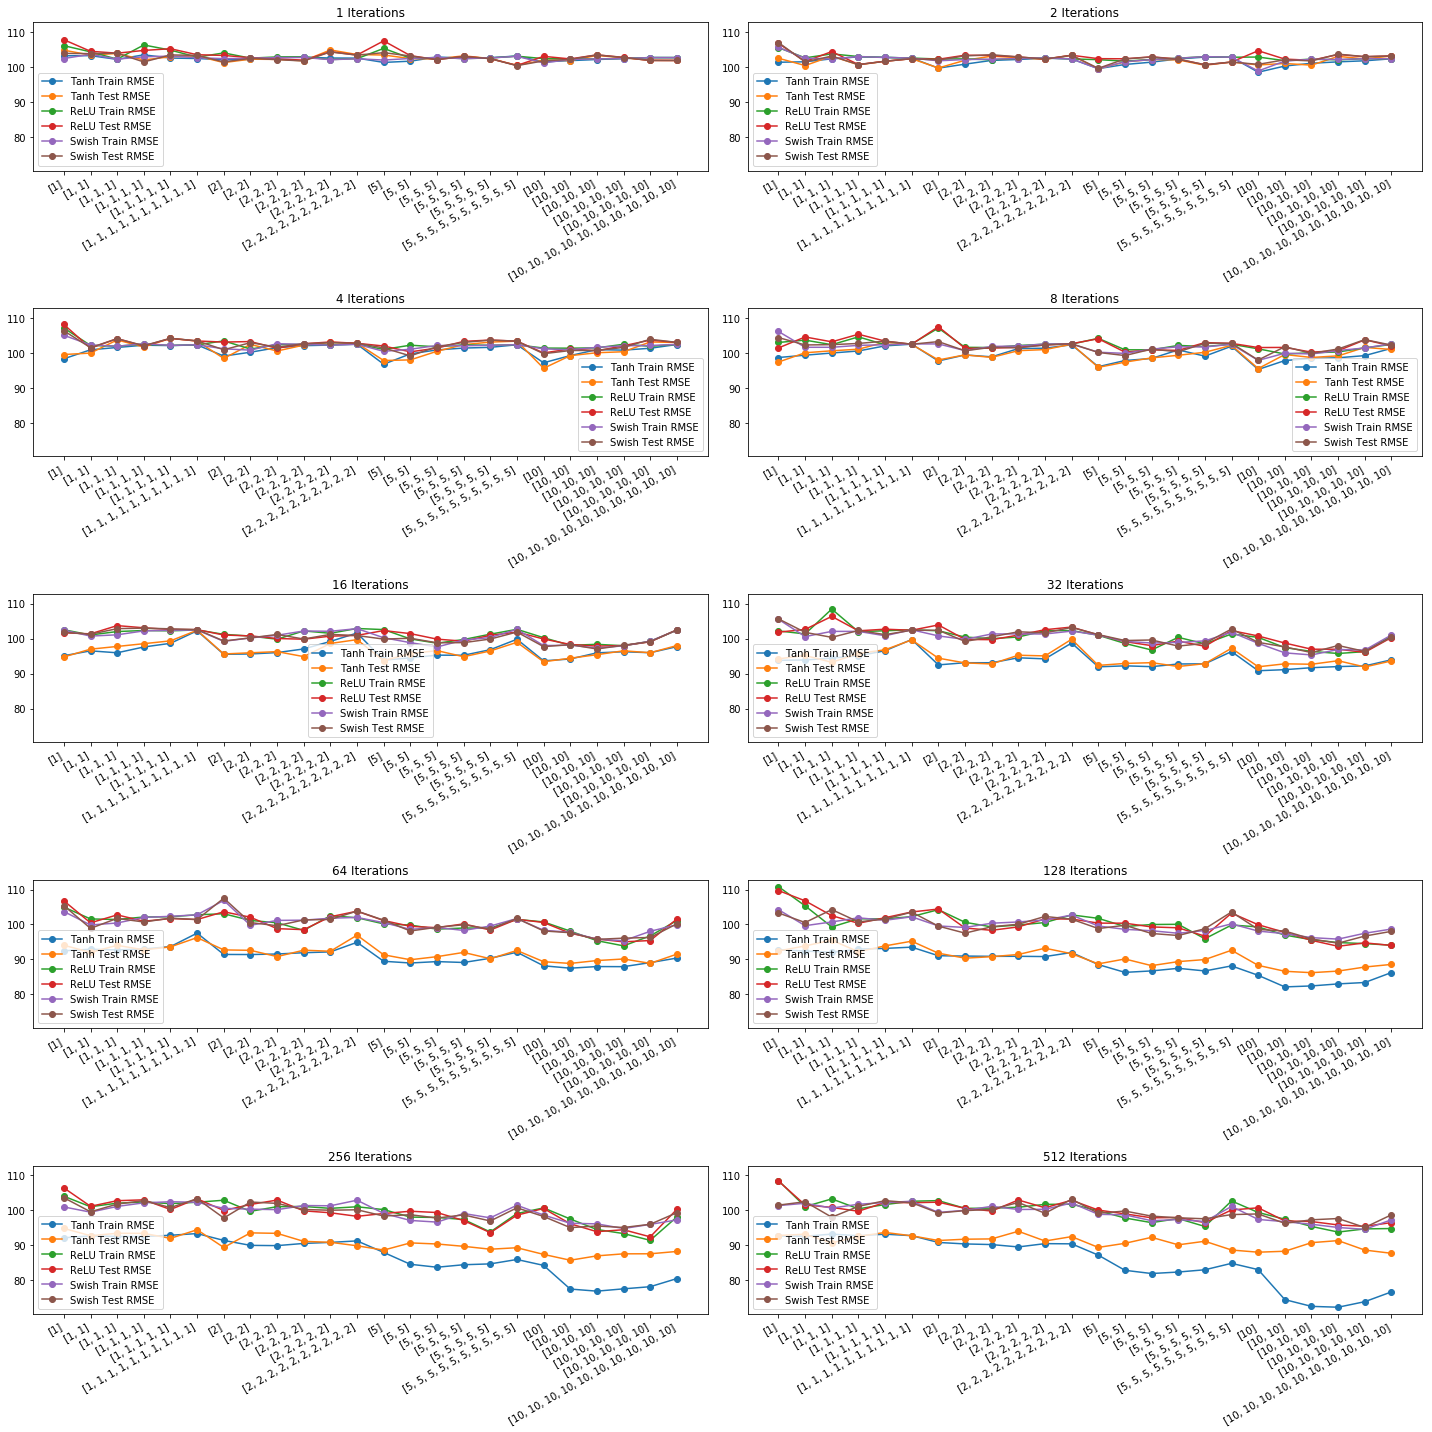

In [34]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

hidden_ticks, = nnT_errors_df['Layer'].shape

plt.figure(1)
for i in iterations:
    ax = plt.subplot(5, 2, iterations.index(i)+1)
    ax.set_ylim(ymin,ymax)
    
    plt.plot(nnT_dict[i][['Train RMSE', 'Test RMSE']].values, 'o-')
    plt.plot(nnR_dict[i][['Train RMSE', 'Test RMSE']].values, 'o-')
    plt.plot(nnS_dict[i][['Train RMSE', 'Test RMSE']].values, 'o-')
    
    plt.title("%d Iterations" % (i))
    plt.legend(('Tanh Train RMSE', 'Tanh Test RMSE', 'ReLU Train RMSE', 'ReLU Test RMSE', 'Swish Train RMSE', 'Swish Test RMSE'))
    plt.xticks(range(hidden_ticks), hiddens, rotation=30, horizontalalignment='right')
plt.tight_layout()